## Fase 2

In [3]:
import pandas as pd

In [4]:
# Cargamos el dataset desde un archivo CSV local
df = pd.read_csv("../COVID19 COLOMBIA - Complete Dataset DEC-2023.csv")

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/2442445018.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../COVID19 COLOMBIA - Complete Dataset DEC-2023.csv")


In [5]:
df.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN


In [6]:
# Analizamos los datos faltantes de cada una de las columnas del dataframe
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_percent], axis=1, keys=["Faltantes", "%"])

,Faltantes,%
Código ISO del país,6383439,99.941977
Nombre del país,6383431,99.941852
Nombre del grupo étnico,6303291,98.687144
Fecha de muerte,6202835,97.114360
Fecha de inicio de síntomas,505292,7.911078
Tipo de recuperación,180390,2.824267
Fecha de recuperación,180316,2.823108
Estado,41200,0.645046
Ubicación del caso,41200,0.645046
Recuperado,36260,0.567703


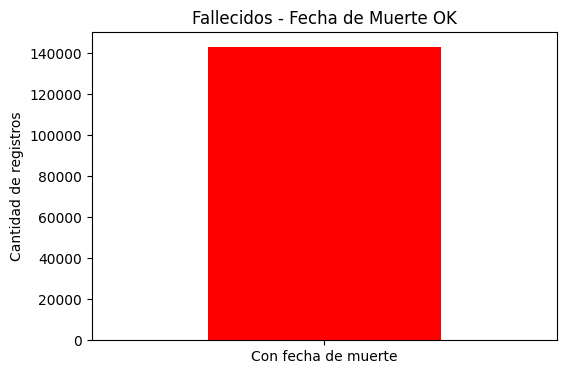

(143110, 23)

In [7]:
# Revisar graficamente la cantidad de campos faltantes (NaN) en la columna "Fecha de muerte" para el Estado "Fallecido", con esto, podemos concluir
# si es necesario eliminar la columna o no es necesario para próximos análisis

import matplotlib.pyplot as plt

# Filtrar solo los fallecidos
df_fallecidos = df[df["Estado"] == "Fallecido"]

# Contar nulos y no nulos en la columna fecha de muerte
conteo = df_fallecidos["Fecha de muerte"].isnull().value_counts()

# Renombrar los índices: True = Sin fecha, False = Con fecha
labels_map = {True: "Sin fecha de muerte", False: "Con fecha de muerte"}
conteo.index = [labels_map[i] for i in conteo.index]

# Gráfico
conteo.plot(kind="bar", color=["red", "green"], figsize=(6,4))
plt.title("Fallecidos - Fecha de Muerte OK")
plt.ylabel("Cantidad de registros")
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()

df_fallecidos.shape

In [8]:
# Resumen global vs. fallecidos: Comparamos nulos en "Fecha de muerte" a nivel general y solo en Estado "Fallecido",para verificar si la 
# columna es consistente y decidir si mantenerla o no

# Datos globales
total_nulos = df["Fecha de muerte"].isnull().sum()
total_registros = len(df)
porcentaje_nulos_total = (total_nulos / total_registros) * 100

# Datos solo de fallecidos
fallecidos = df[df["Estado"] == "Fallecido"]
nulos_fallecidos = fallecidos["Fecha de muerte"].isnull().sum()
total_fallecidos = len(fallecidos)
porcentaje_nulos_fallecidos = (nulos_fallecidos / total_fallecidos) * 100

# Crear tabla resumen
tabla_resumen = pd.DataFrame({
    "Ámbito": ["Dataset completo", "Solo Fallecidos"],
    "Total registros": [total_registros, total_fallecidos],
    "Nulos 'Fecha de muerte'": [total_nulos, nulos_fallecidos],
    "% Nulos": [porcentaje_nulos_total, porcentaje_nulos_fallecidos]
})

print(tabla_resumen)

             Ámbito  Total registros  Nulos 'Fecha de muerte'   % Nulos
0  Dataset completo          6387145                  6202835  97.11436
1   Solo Fallecidos           143110                        0   0.00000


In [9]:
# Se identificaron varias columnas con datos faltantes. Eliminamos aquellas con más del 95% de valores nulos,
# excepto "Fecha de muerte". Aunque presenta muchos nulos a nivel global (debido a estados distintos a "Fallecido"),
# en los registros de fallecidos está completa al 100%, por lo que se conserva para futuros análisis

# Eliminar las columnas no deseadas según el análisis previo
columnas_a_eliminar = [
    "Código ISO del país",
    "Nombre del país",
    "Nombre del grupo étnico"
]
df = df.drop(columns=columnas_a_eliminar)

# Guardar un nuevo CSV sin esas columnas
df.to_csv("dataset_limpio.csv", index=False, encoding="utf-8-sig")


In [10]:
# Cargamos el dataset limpio desde un archivo CSV local
df = pd.read_csv("dataset_limpio.csv")

# Analizamos nuevamente los datos faltantes de cada una de las columnas del dataframe para confirmar que se eliminaron 
# las columnas con más del 95% de datos faltantes
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_percent], axis=1, keys=["Faltantes", "%"])

,Faltantes,%
Fecha de muerte,6202835,97.114360
Fecha de inicio de síntomas,505292,7.911078
Tipo de recuperación,180390,2.824267
Fecha de recuperación,180316,2.823108
Estado,41200,0.645046
Ubicación del caso,41200,0.645046
Recuperado,36260,0.567703
Fecha de diagnóstico,2755,0.043134
Pertenencia étnica,560,0.008768
ID de caso,0,0.000000


In [11]:
import numpy as np

def outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

# Ejemplo sobre todas las columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    outliers, low, up = outliers_iqr(df, col)
    print(f"Columna: {col}")
    print(f"   Rango aceptado: [{low:.2f}, {up:.2f}]")
    print(f"   Nº de outliers detectados: {len(outliers)}\n")


Columna: ID de caso
   Rango aceptado: [-3193531.00, 9580757.00]
   Nº de outliers detectados: 0

Columna: Código DIVIPOLA departamento
   Rango aceptado: [-74.50, 153.50]
   Nº de outliers detectados: 526240

Columna: Código DIVIPOLA municipio
   Rango aceptado: [-50499.00, 113501.00]
   Nº de outliers detectados: 0

Columna: Edad
   Rango aceptado: [-12.00, 92.00]
   Nº de outliers detectados: 14929

Columna: Unidad de medida de edad
   Rango aceptado: [1.00, 1.00]
   Nº de outliers detectados: 32893

Columna: Pertenencia étnica
   Rango aceptado: [6.00, 6.00]
   Nº de outliers detectados: 222119



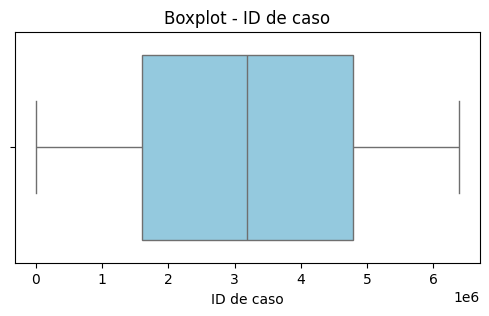

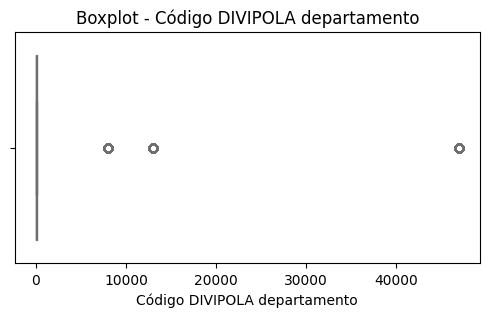

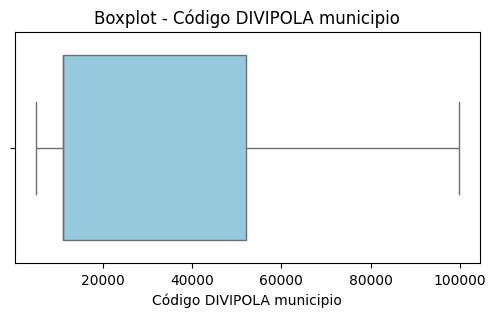

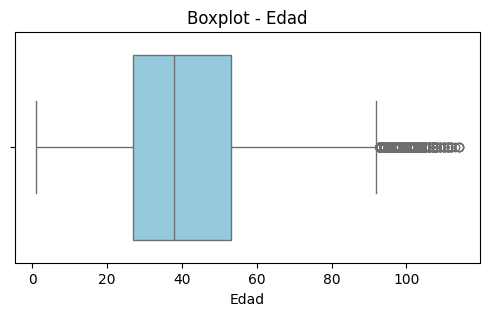

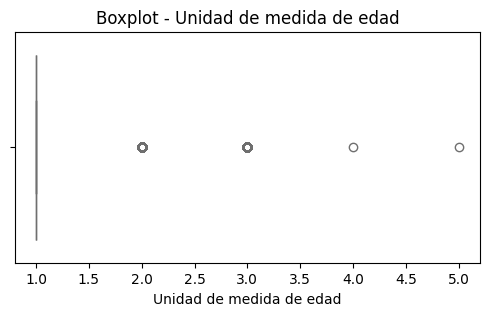

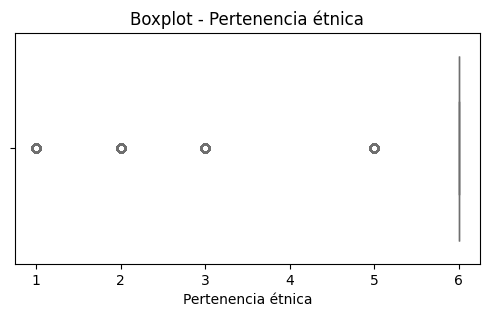

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot - {col}")
    plt.show()


In [13]:
# Verificar cuántas edades negativas hay para definir si se hace imputación o eliminación de registros
print("Cantidad de edades negativas:", (df["Edad"] < 0).sum())

Cantidad de edades negativas: 0


In [14]:
# Revisión de valores atípicos en Edad
## - El rango aceptado por IQR fue: [-12, 92]
## - Aunque el límite inferior resultó negativo, no existen registros con edades < 0 en la BD
## - Por lo tanto, no fue necesario realizar imputación o eliminación de registros en este caso

In [15]:
# Lista de códigos válidos de departamentos
codigos_validos = [5, 8, 11, 13, 15, 17, 18, 19, 20, 23, 25, 27, 41, 
                   44, 47, 50, 52, 54, 63, 66, 68, 70, 73, 76, 81, 85, 
                   86, 88, 91, 94, 95, 97, 99]

# Reemplazar valores inválidos con NaN
df.loc[~df["Código DIVIPOLA departamento"].isin(codigos_validos), "Código DIVIPOLA departamento"] = np.nan

# Ver cuántos quedaron como NaN
print("Valores nulos en departamento:", df["Código DIVIPOLA departamento"].isna().sum())

# Revisar valores únicos después de la limpieza
print("Valores únicos en departamento:", df["Código DIVIPOLA departamento"].unique())


Valores nulos en departamento: 526240
Valores únicos en departamento: [76.  5. 68. 54. 17. 11. 25. 18. 63. 66. 85. 52. 41. 20. 50. nan 73. 19.
 70. 13. 44.  8. 23. 47. 81. 15. 88. 27. 95. 99. 86. 97. 94. 91.]


In [16]:
# Revisar rango de códigos de municipios
print("Mínimo:", df["Código DIVIPOLA municipio"].min())
print("Máximo:", df["Código DIVIPOLA municipio"].max())

Mínimo: 5001
Máximo: 99773


In [17]:
# En este caso, no se encontraron valores fuera del rango esperado, por lo que no se realizaron cambios adicionales en la columna.

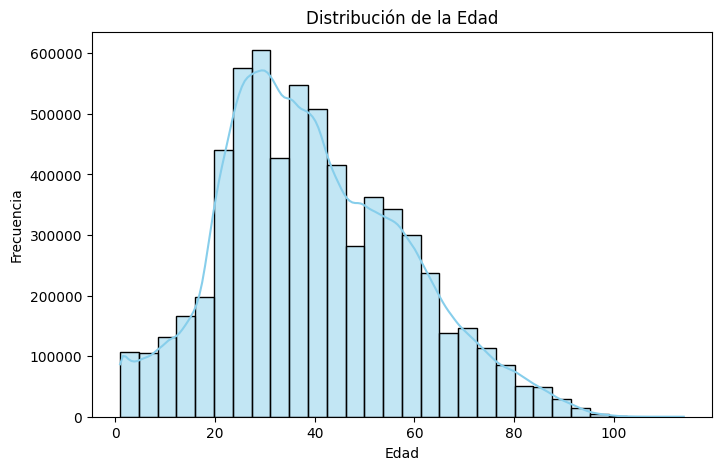

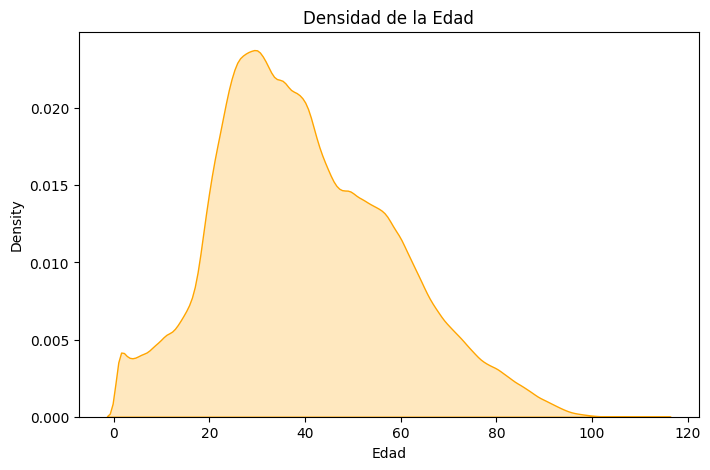

Asimetría (Skewness): 0.39
Curtosis: -0.21


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np

# Histograma + curva de densidad
plt.figure(figsize=(8,5))
sns.histplot(df['Edad'].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Gráfica de densidad (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(df['Edad'].dropna(), fill=True, color='orange')
plt.title("Densidad de la Edad")
plt.xlabel("Edad")
plt.show()

# Estadísticos de forma
edad = df['Edad'].dropna()
print(f"Asimetría (Skewness): {skew(edad):.2f}")
print(f"Curtosis: {kurtosis(edad):.2f}")

# Ejemplo de transformación logarítmica (si hay sesgo fuerte)
df['Edad_log'] = np.log1p(df['Edad'])  # log(edad+1)


In [19]:
# Análisis de la variable Edad
# - La distribución se inclina un poco hacia la derecha (personas de mayor edad)
# - Tiene una forma parecida a la normal, sin colas muy raras
# - La mayoría está entre 20 y 40 años, con un pico en 20-35
# - Después de los 60 años la frecuencia baja poco a poco
# - En conclusión: se parece bastante a una normal, con un ligero sesgo, por lo que no es necesario aplicar transformaciones.

# Las demás variables numéricas no se analizan en detalle, ya que no son de interés principal en este estudio. 
# Además, muchas de ellas representan categorías o conteos (por ejemplo, los códigos DIVIPOLA de departamentos y municipios), 
# por lo que no requieren un análisis estadístico profundo.


Estadísticos descriptivos de variables categóricas:


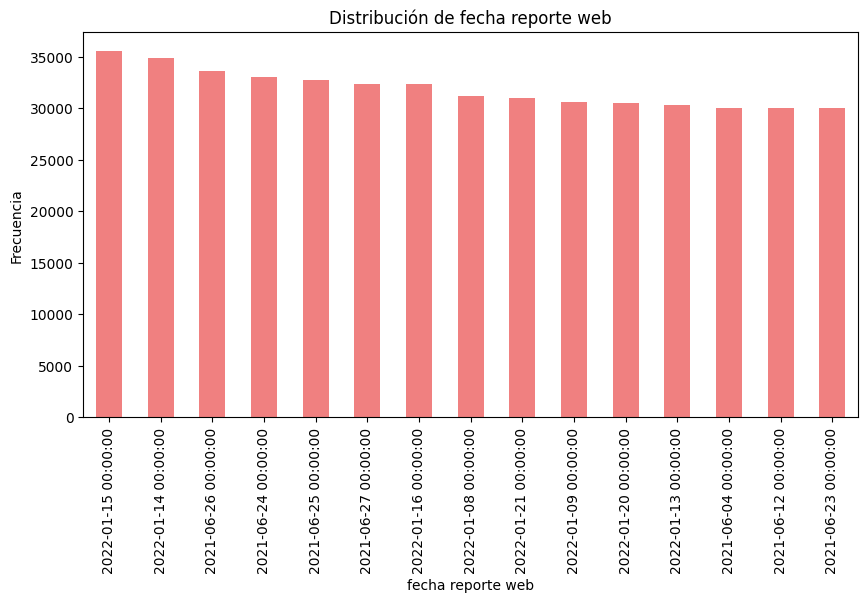

🔸 fecha reporte web: 869 categorías


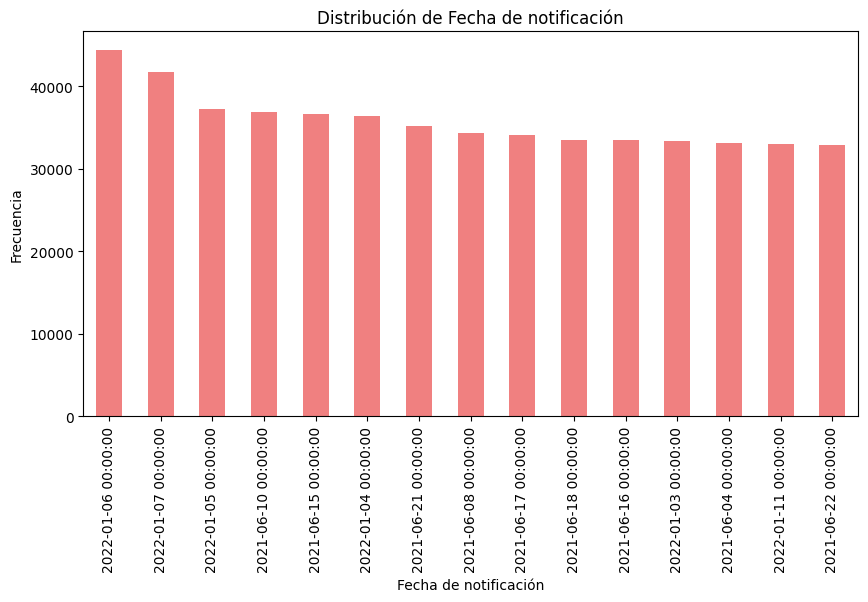

🔸 Fecha de notificación: 1392 categorías


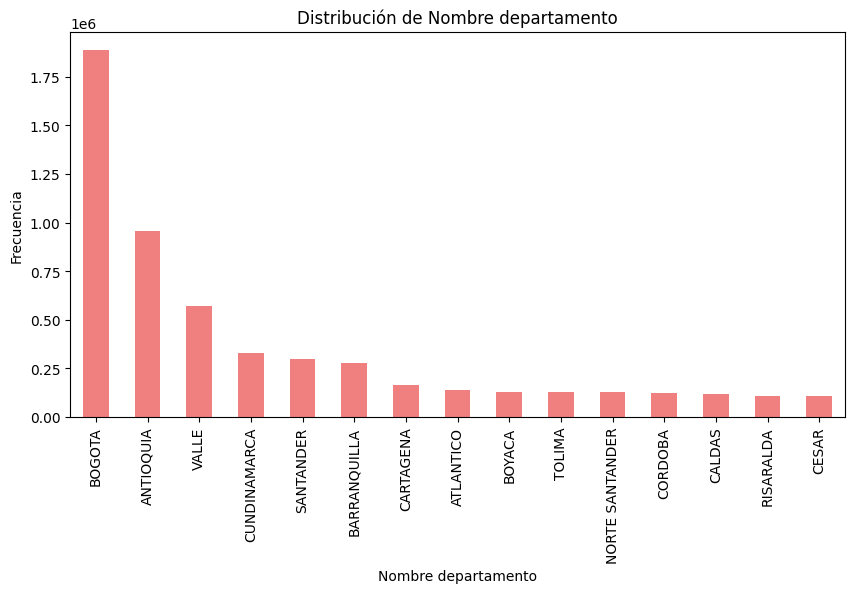

🔸 Nombre departamento: 41 categorías


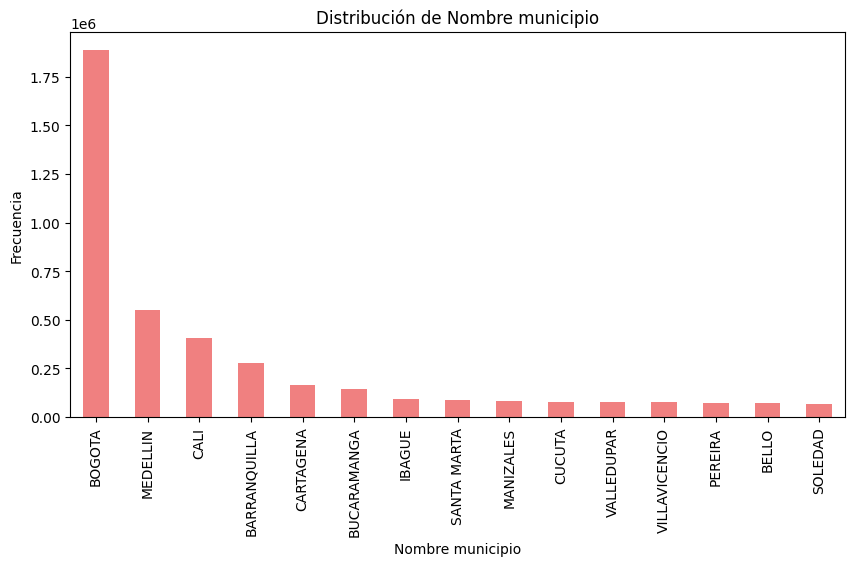

🔸 Nombre municipio: 1057 categorías


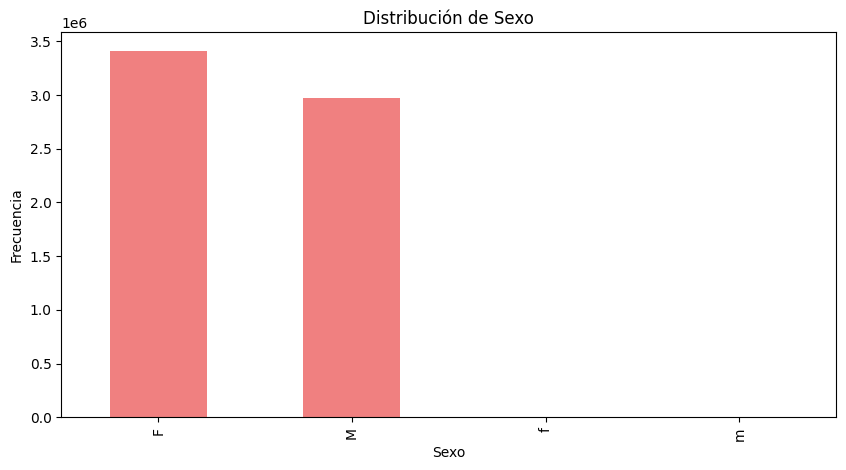

🔸 Sexo: 4 categorías


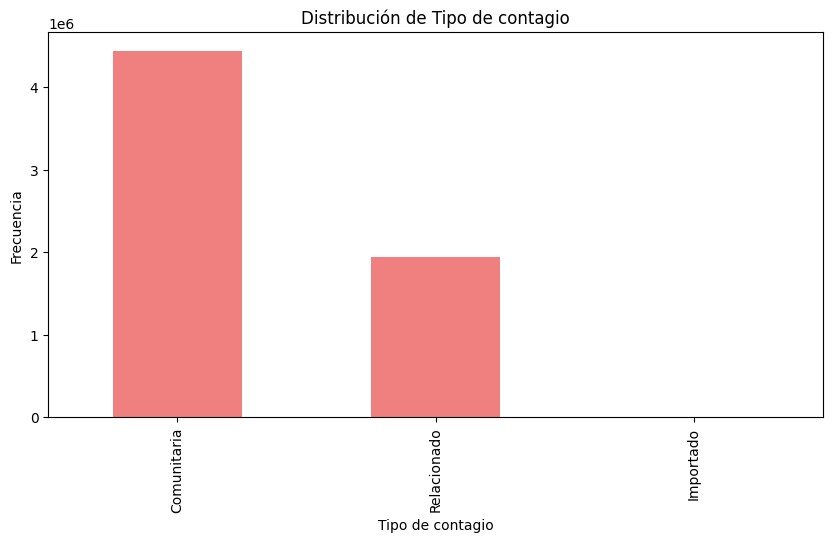

🔸 Tipo de contagio: 3 categorías


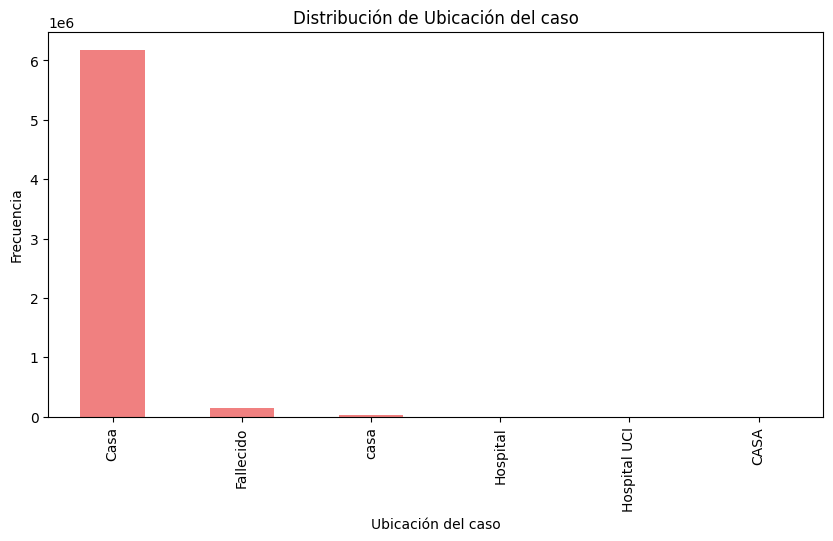

🔸 Ubicación del caso: 6 categorías


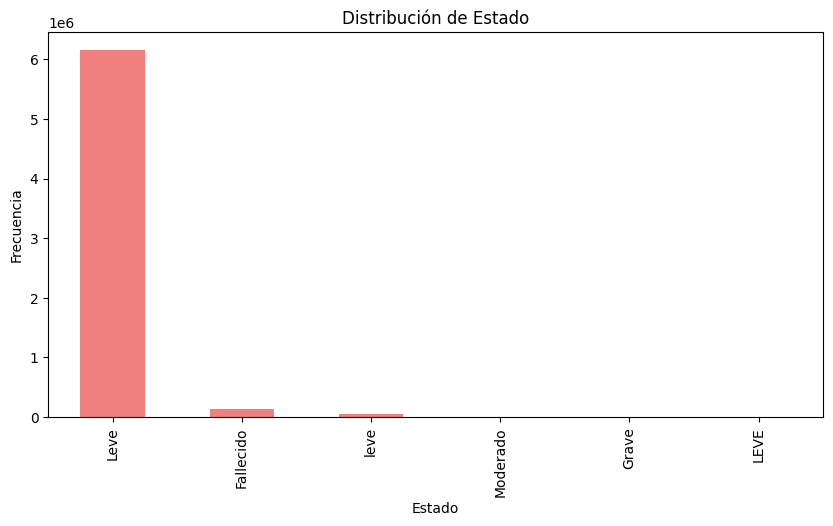

🔸 Estado: 6 categorías


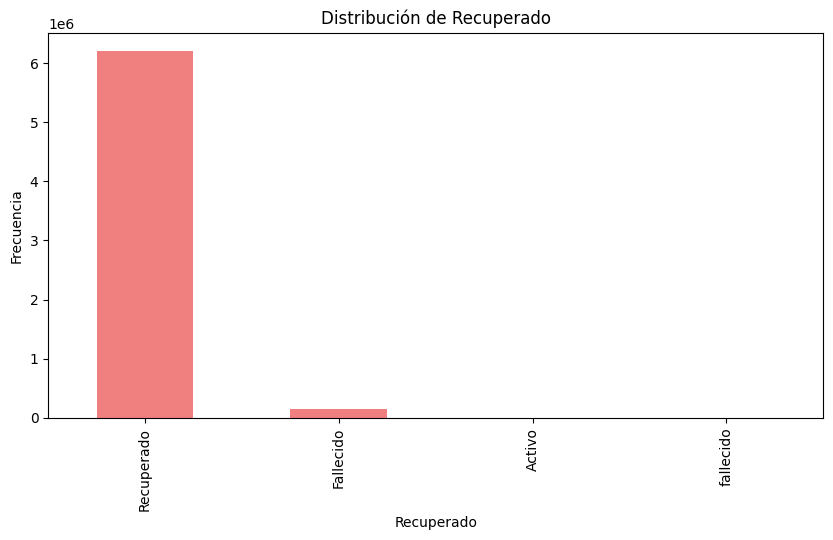

🔸 Recuperado: 4 categorías


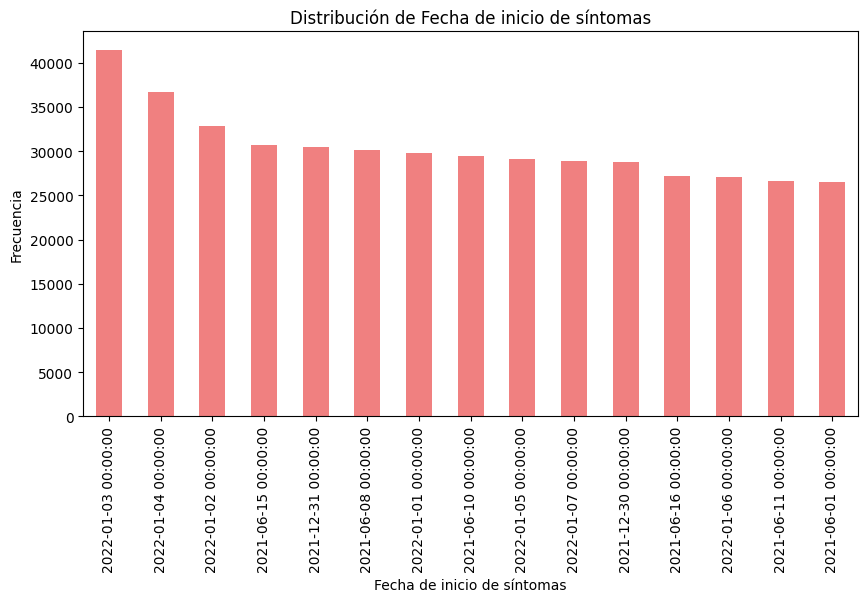

🔸 Fecha de inicio de síntomas: 1397 categorías


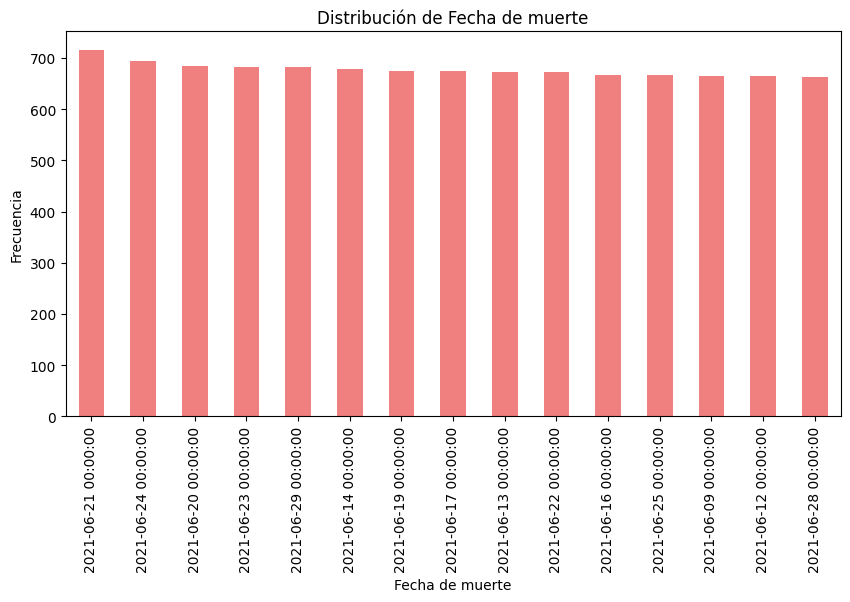

🔸 Fecha de muerte: 1370 categorías


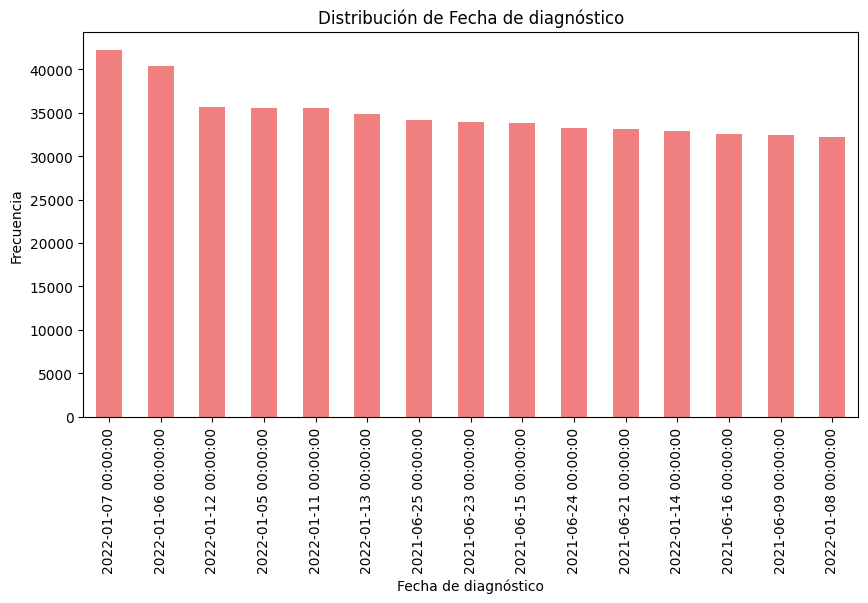

🔸 Fecha de diagnóstico: 1389 categorías


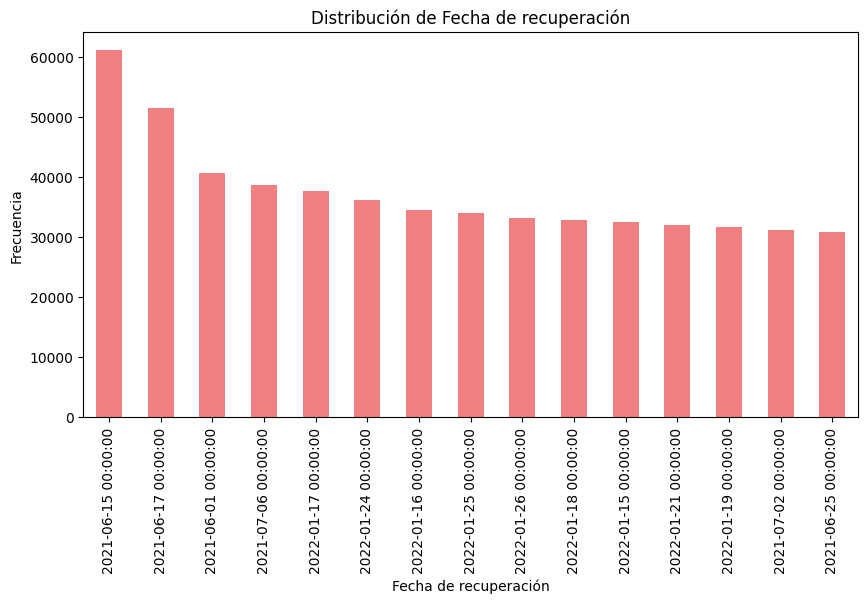

🔸 Fecha de recuperación: 966 categorías


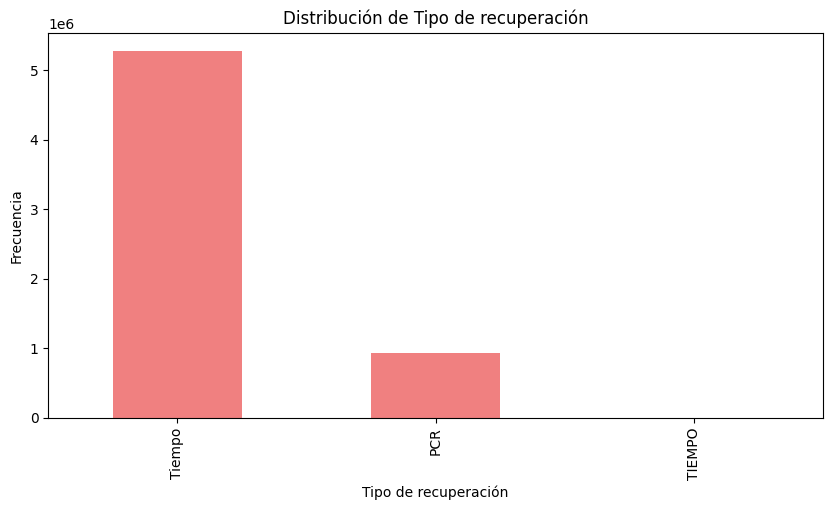

🔸 Tipo de recuperación: 3 categorías


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis

# Separar variables categóricas
cat_cols = df.select_dtypes(include=['object','category']).columns

print("\nEstadísticos descriptivos de variables categóricas:")

for col in cat_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind="bar", color="lightcoral")
    plt.title(f"Distribución de {col}")
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.show()
    
    print(f"🔸 {col}: {df[col].nunique()} categorías")


In [21]:
# A partir de las gráficas se puede observar que algunas categorías presentan inconsistencias debido a errores tipográficos 
# o diferencias en mayúsculas/minúsculas. Por ejemplo: ("Tiempo" y "TIEMPO"), ("Fallecido" y "fallecido"), ("Leve", "LEVE" y "leve"). 
# # Estas categorías deben ser corregidas y unificadas para garantizar la calidad de los datos.

In [22]:
# Corrección de categorías inconsistentes

# Tipo de recuperación:  unificar "Tiempo" y "TIEMPO"
df["Tipo de recuperación"] = (
    df["Tipo de recuperación"]
    .str.strip()
    .str.lower()
    .replace({"TIEMPO": "Tiempo", "pcr": "PCR"})
    .str.title()
)
# Corrección final: evitar que "PCR" se convierta en "Pcr"
df["Tipo de recuperación"] = df["Tipo de recuperación"].replace({"Pcr": "PCR"})

# Recuperado: unificar "Fallecido" y "fallecido"
df["Recuperado"] = df["Recuperado"].str.strip().str.capitalize()

# Estado: unificar "Leve, LEVE, leve"
df["Estado"] = df["Estado"].str.strip().str.capitalize()

# Estado: unificar todo mayusculas
df["Sexo"] = df["Sexo"].str.strip().str.upper()    

# Ubicación del caso: unificar "Casa, casa, CASA"
df["Ubicación del caso"] = df["Ubicación del caso"].str.strip().str.capitalize()

# Verificación de cambios
print("Valores únicos en Tipo de recuperación:", df["Tipo de recuperación"].unique())
print("Valores únicos en Recuperado:", df["Recuperado"].unique())
print("Valores únicos en Estado:", df["Estado"].unique())
print("Valores únicos en Estado:", df["Sexo"].unique())
print("Valores únicos en Ubicación del caso:", df["Ubicación del caso"].unique())

Valores únicos en Tipo de recuperación: ['Tiempo' nan 'PCR']
Valores únicos en Recuperado: ['Recuperado' 'Fallecido' nan 'Activo']
Valores únicos en Estado: ['Leve' 'Fallecido' nan 'Moderado' 'Grave']
Valores únicos en Estado: ['F' 'M']
Valores únicos en Ubicación del caso: ['Casa' 'Fallecido' nan 'Hospital' 'Hospital uci']


/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


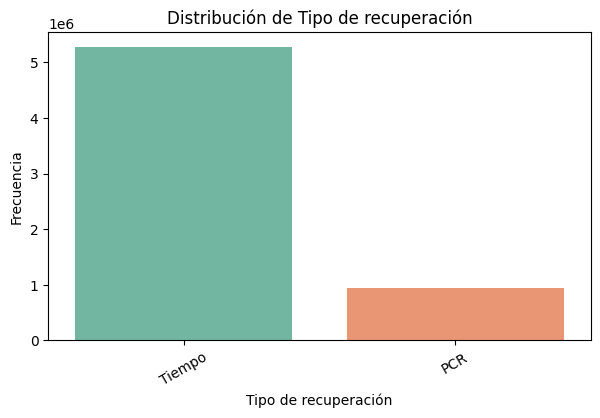

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


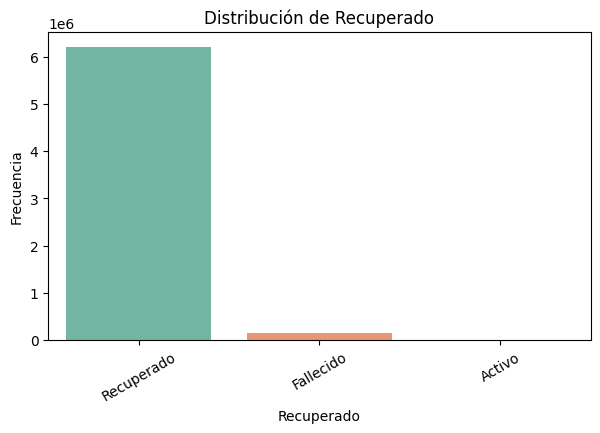

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


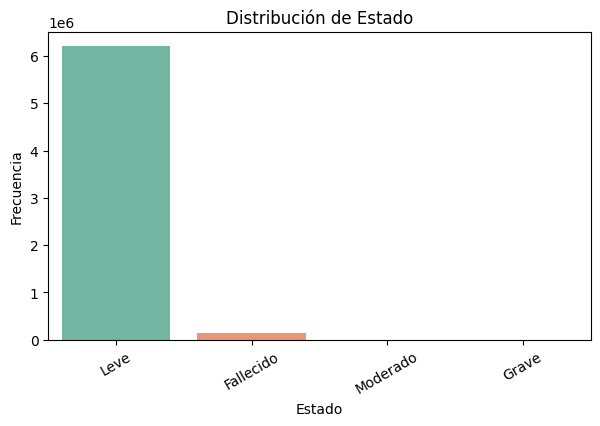

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


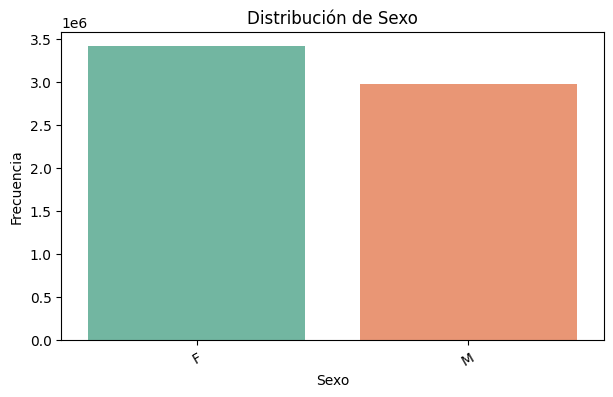

/var/folders/xx/jrhm0x3n7zz82vrx0878nkfm0000gn/T/ipykernel_94779/1825635131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


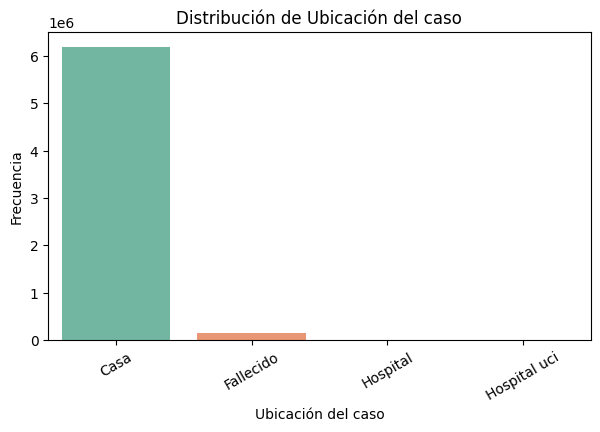

In [23]:
# Ahora graficaremos nuevamente las variables categóricas para verificar que las correcciones se aplicaron correctamente

import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas corregidas
cols_corr = ["Tipo de recuperación", "Recuperado", "Estado", "Sexo", "Ubicación del caso"]

for col in cols_corr:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"Distribución de {col}")
    plt.ylabel("Frecuencia")
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.show()


In [24]:
# En este caso, se corrigieron las inconsistencias en las categorías de las variables seleccionadas, ahora vamos a analizar las que son tipo fecha
# para verificar que no haya errores o inconsistencias en los formatos.

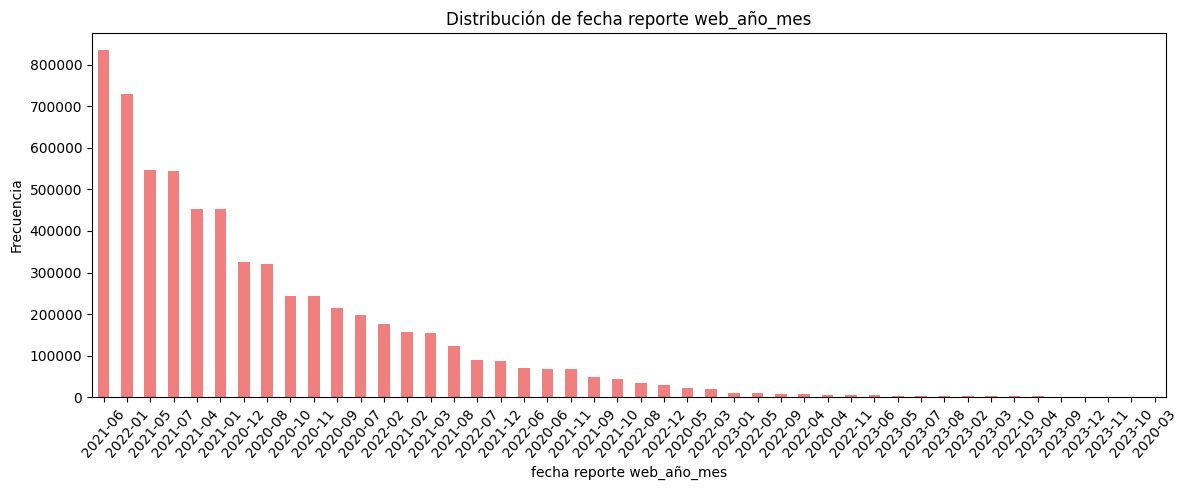

● fecha reporte web_año_mes: 46 categorías


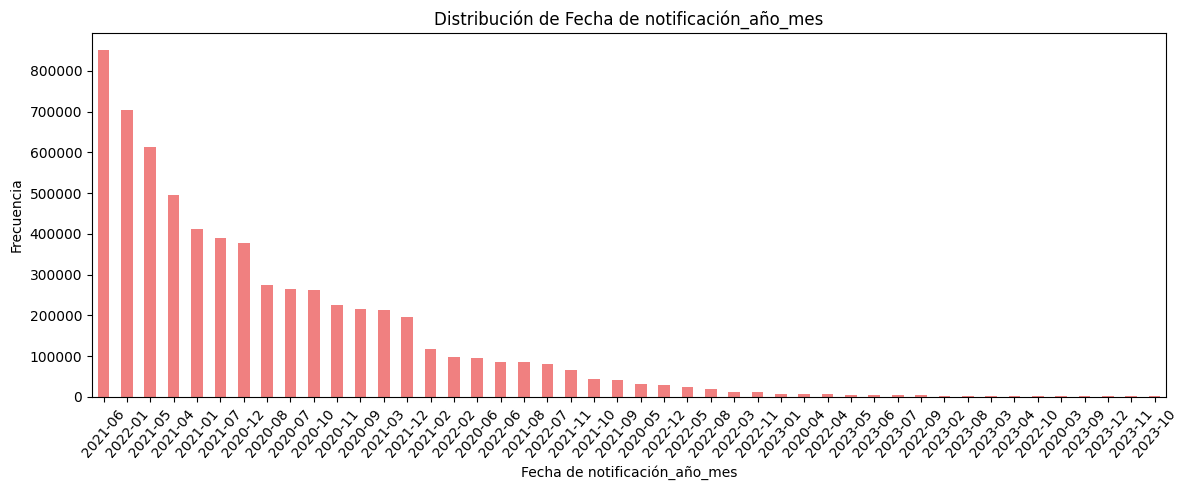

● Fecha de notificación_año_mes: 46 categorías


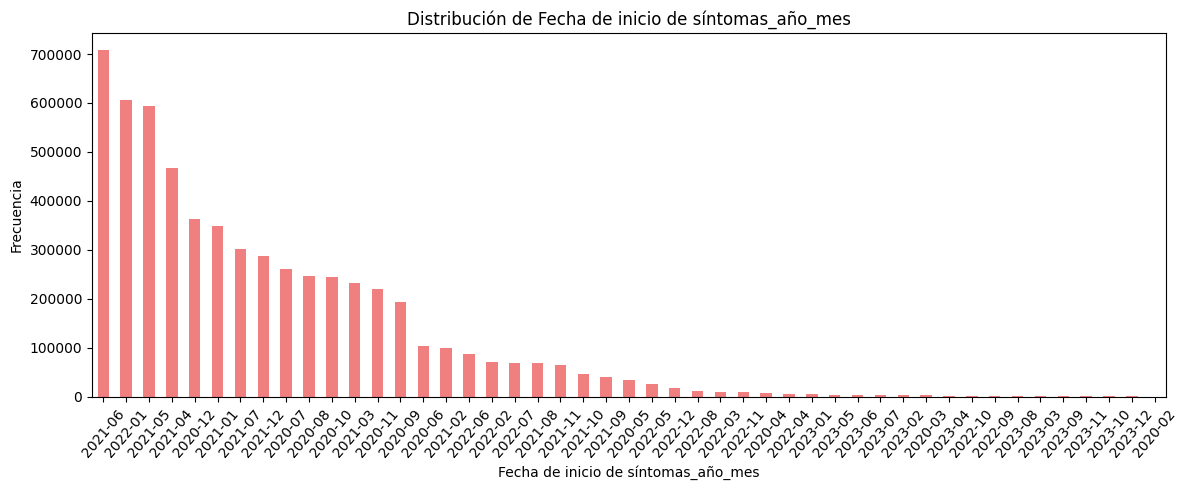

● Fecha de inicio de síntomas_año_mes: 47 categorías


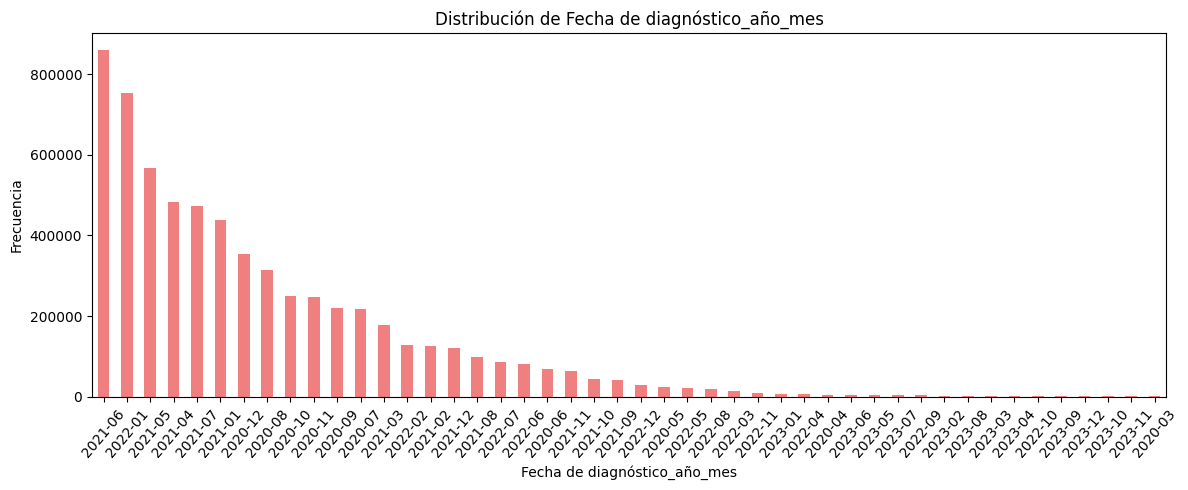

● Fecha de diagnóstico_año_mes: 46 categorías


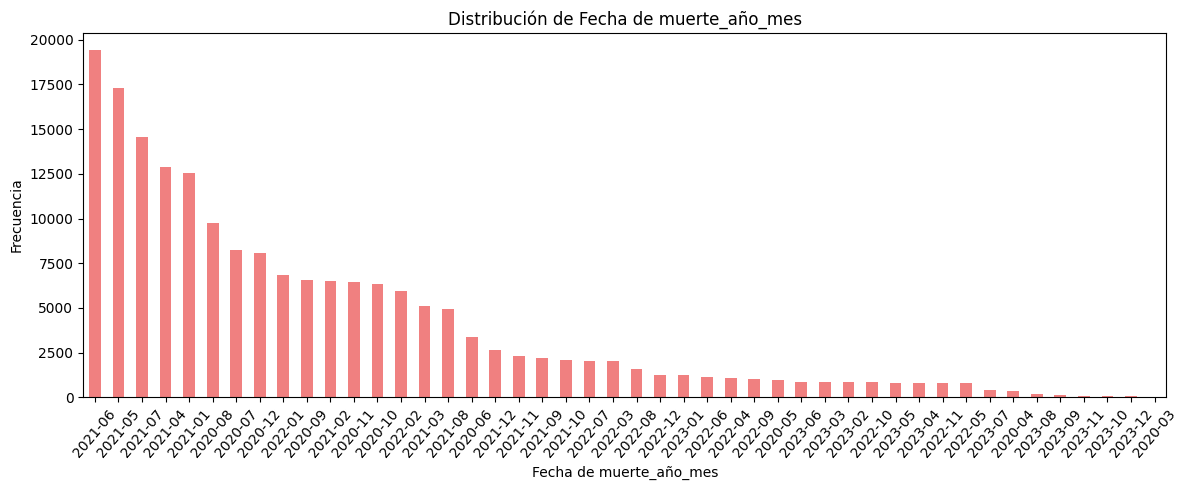

● Fecha de muerte_año_mes: 46 categorías


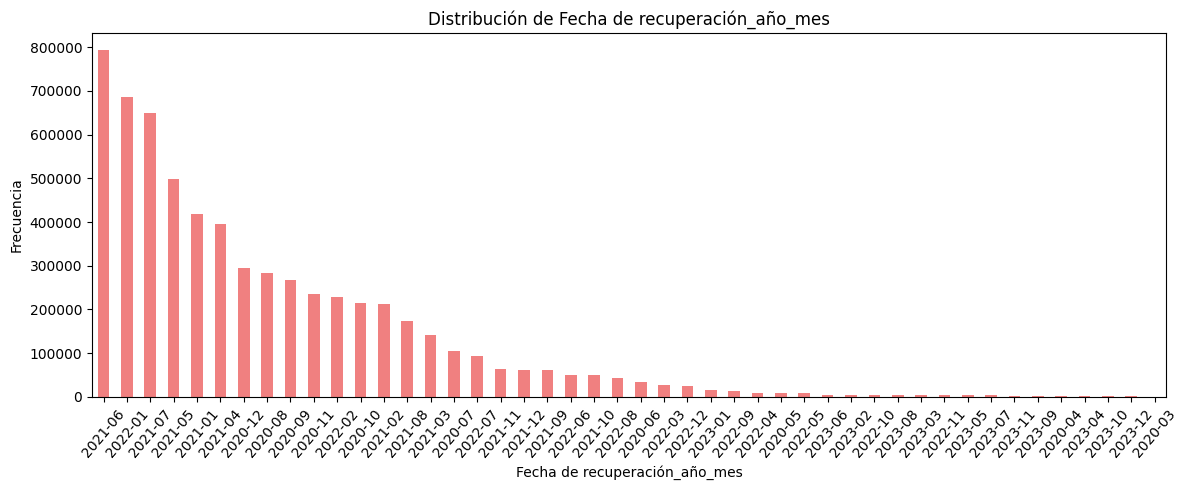

● Fecha de recuperación_año_mes: 46 categorías

Resumen para Fecha de muerte:
Fecha de muerte_año_mes  cantidad
                2020-03        32
                2020-04       342
                2020-05       944
                2020-06      3376
                2020-07      8265
                2020-08      9726
                2020-09      6555
                2020-10      6317
                2020-11      6456
                2020-12      8086
                2021-01     12533
                2021-02      6490
                2021-03      5098
                2021-04     12871
                2021-05     17276
                2021-06     19415
                2021-07     14549
                2021-08      4949
                2021-09      2199
                2021-10      2089
                2021-11      2329
                2021-12      2638
                2022-01      6867
                2022-02      5956
                2022-03      2020
                2022-04      1060
    

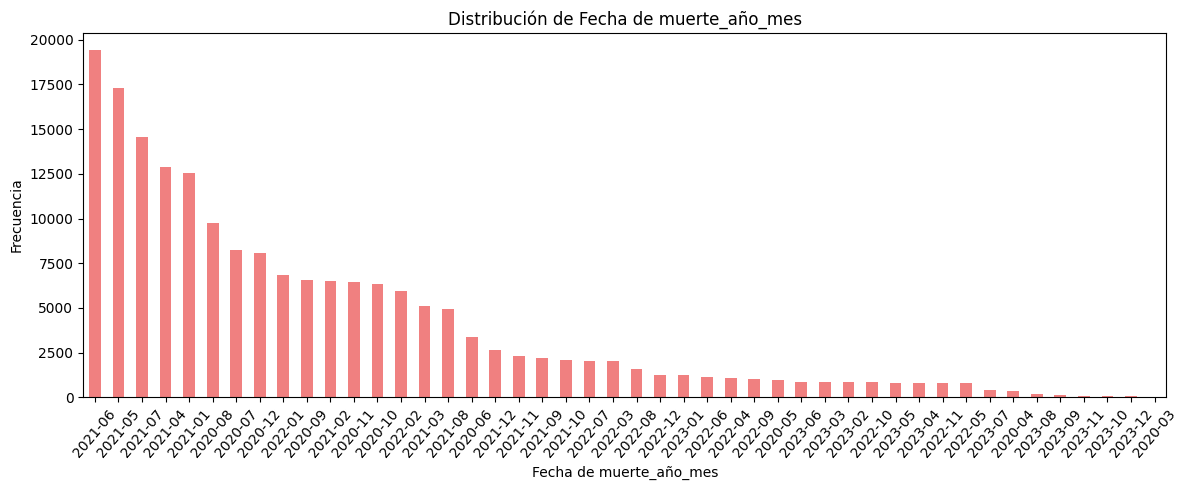

● Fecha de muerte_año_mes: 46 categorías


In [ ]:
# Lista de columnas de fechas a procesar
cols_corr = [
    "fecha reporte web",
    "Fecha de notificación",
    "Fecha de inicio de síntomas",
    "Fecha de diagnóstico",
    "Fecha de recuperación",
    "Fecha de muerte"
]

for col in cols_corr:
    # Convertir columna a datetime
    df[col] = pd.to_datetime(df[col], errors="coerce")
    
    # Crear columna con periodo Año-Mes
    df[col + "_año_mes"] = df[col].dt.to_period("M")
    
    # Agrupar por Año-Mes y contar casos
    resumen = df.groupby(col + "_año_mes").size().reset_index(name="cantidad")
    
    # Graficar distribución (top 45 fechas más frecuentes)
    plt.figure(figsize=(12, 5))
    df[col + "_año_mes"].value_counts().head(50).plot(kind="bar", color="lightcoral")
    plt.title("Distribución de {}_año_mes".format(col))
    plt.ylabel("Frecuencia")
    plt.xlabel(col + "_año_mes")
    plt.xticks(rotation=50)
    plt.tight_layout()
    plt.show()
    
    # Mostrar número de categorías únicas
    print(f"● {col}_año_mes: {df[col + '_año_mes'].nunique()} categorías")


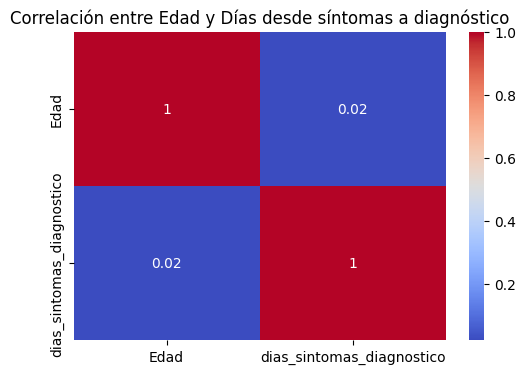

In [26]:
df["Fecha de inicio de síntomas"] = pd.to_datetime(df["Fecha de inicio de síntomas"], errors="coerce")
df["Fecha de diagnóstico"] = pd.to_datetime(df["Fecha de diagnóstico"], errors="coerce")
df["dias_sintomas_diagnostico"] = (df["Fecha de diagnóstico"] - df["Fecha de inicio de síntomas"]).dt.days

plt.figure(figsize=(6,4))
sns.heatmap(df[["Edad", "dias_sintomas_diagnostico"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre Edad y Días desde síntomas a diagnóstico")
plt.show()

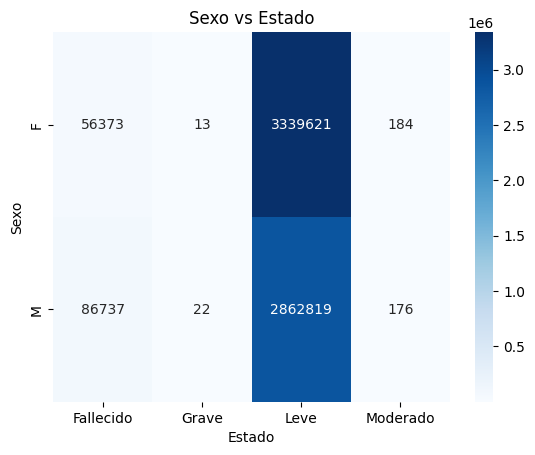

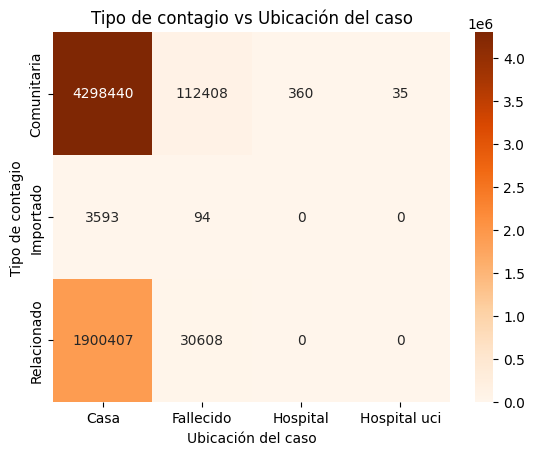

In [ ]:
tabla_sexo_estado = pd.crosstab(df["Sexo"], df["Estado"])
sns.heatmap(tabla_sexo_estado, annot=True, fmt="d", cmap="Blues")
plt.title("Sexo vs Estado")
plt.show()

tabla_tipo_ubicacion = pd.crosstab(df["Tipo de contagio"], df["Ubicación del caso"])
sns.heatmap(tabla_tipo_ubicacion, annot=True, fmt="d", cmap="Oranges")
plt.title("Tipo de contagio vs Ubicación del caso")
plt.show()

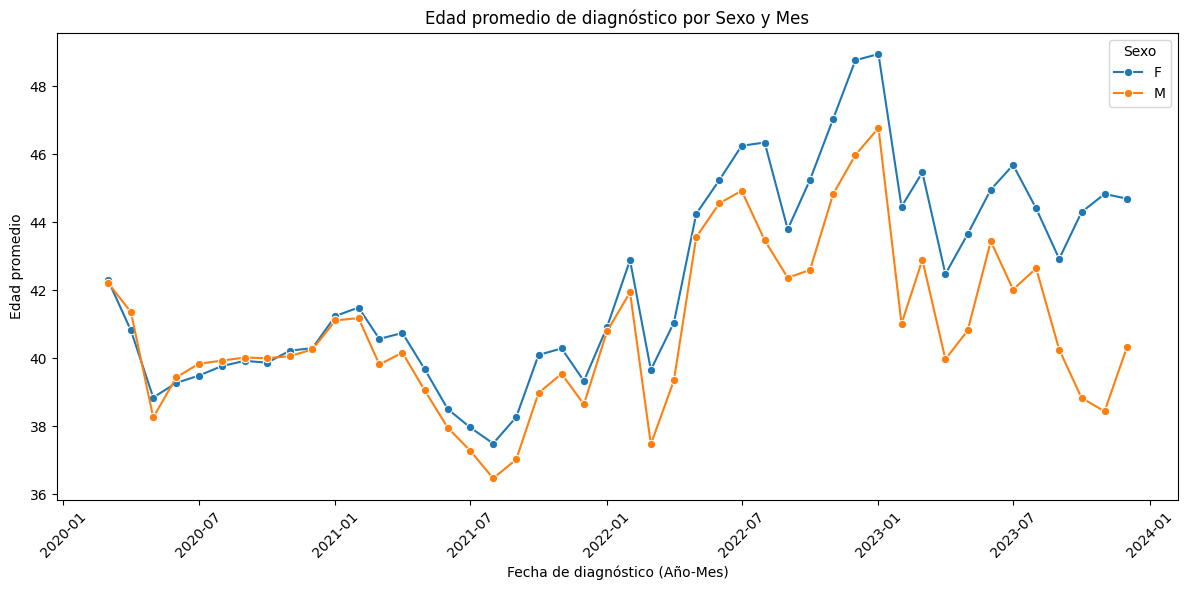

In [ ]:
df["Fecha de diagnóstico"] = pd.to_datetime(df["Fecha de diagnóstico"], errors="coerce")

# Crear columna Año-Mes
df["fecha_diag_ym"] = df["Fecha de diagnóstico"].dt.to_period("M").astype(str)

# Convertir columnas al tipo adecuado
df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")

# Agrupar: edad promedio por Año-Mes y Sexo
resumen = (
    df.groupby(["fecha_diag_ym", "Sexo"])["Edad"]
      .mean()
      .reset_index()
)

# Convertir fecha agrupada a datetime para graficar ordenadamente
resumen["fecha_diag_ym"] = pd.to_datetime(resumen["fecha_diag_ym"])

plt.figure(figsize=(12, 6))
sns.lineplot(data=resumen, x="fecha_diag_ym", y="Edad", hue="Sexo", marker="o")

plt.title("Edad promedio de diagnóstico por Sexo y Mes")
plt.xlabel("Fecha de diagnóstico (Año-Mes)")
plt.ylabel("Edad promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

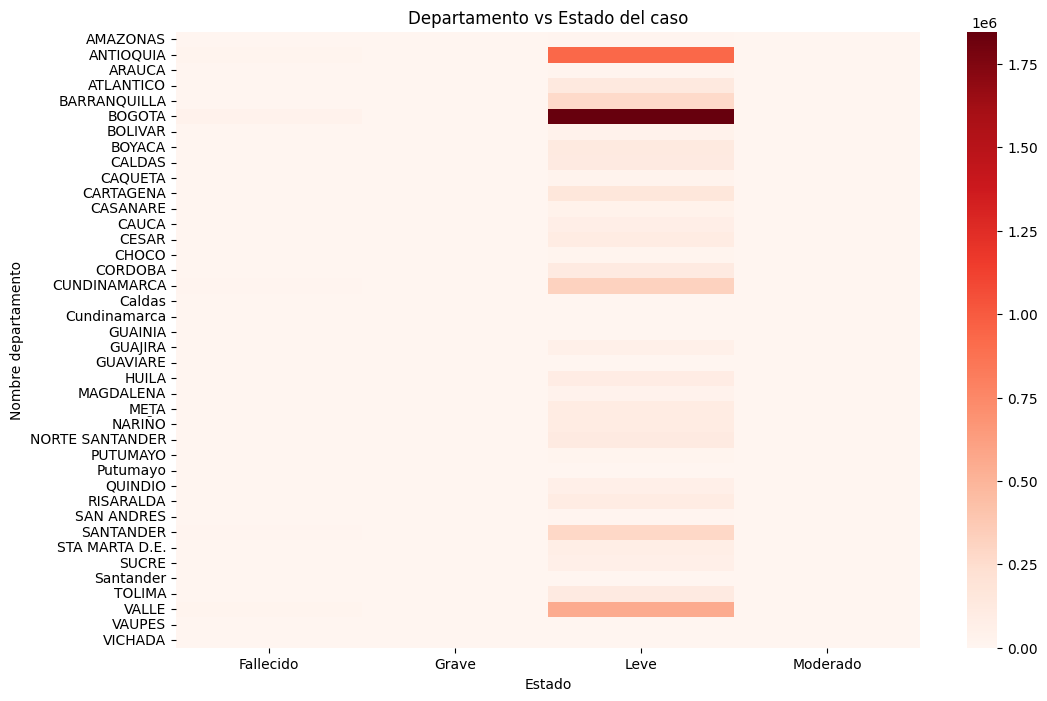

In [29]:
tabla_dep_estado = pd.crosstab(df["Nombre departamento"], df["Estado"])
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_dep_estado, cmap="Reds", cbar=True)
plt.title("Departamento vs Estado del caso")
plt.show()

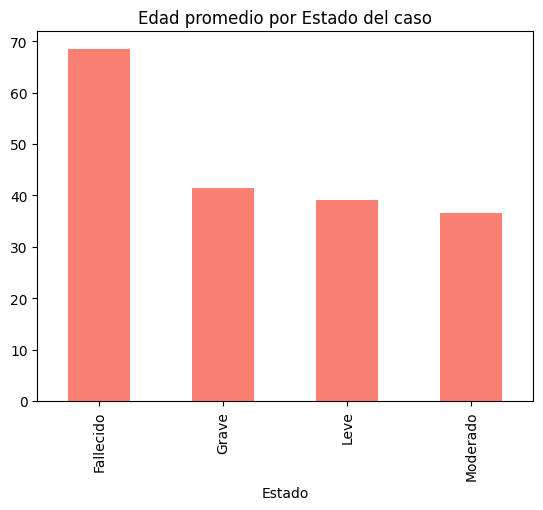

In [30]:
df.groupby("Estado")["Edad"].mean().plot(kind="bar", color="salmon")
plt.title("Edad promedio por Estado del caso")
plt.show()

In [ ]:
# Se observa cómo la distribución de las edades diagnosticadas se mantiene amplia en el tiempo
# No hay un sesgo fuerte hacia un sexo en particular, aunque puede notarse cierta concentración de diagnósticos en grupos etarios medios
# Se identifican fluctuaciones en la edad promedio diagnosticada mes a mes.
# Las diferencias entre hombres y mujeres no parecen extremas, pero sí se aprecian pequeñas variaciones en determinados periodos.
# Los recuperados tienden a tener tiempos de diagnóstico más cortos que los fallecidos
# Hay diferencias visibles en el número de casos entre hombres y mujeres, dependiendo del estado final (recuperado, fallecido, activo).

In [ ]:
num_vars = df.select_dtypes(include=["int64", "float64"])

# Matriz de correlación
corr = num_vars.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor - Correlación entre variables numéricas")
plt.show()

In [ ]:
# La correlación más fuerte es entre Edad y Edad_log (0.91), lo cual es esperado porque una es transformación de la otra
# Entre las demás variables numéricas, las correlaciones son muy bajas (cercanas a 0)
# Esto indica que no hay relaciones lineales importantes entre Edad y las otras variables numéricas del dataset
# En conclusión: Edad se comporta como una variable independiente respecto a la mayoría de variables numéricas

In [ ]:
# Boxplot para relacionar Sexo y Edad
plt.figure(figsize=(7,5))
sns.boxplot(x="Sexo", y="Edad", data=df, palette="Set2")
plt.title("Distribución de Edad por Sexo")
plt.show()

In [ ]:
# La distribución de edades en hombres (M) y mujeres (F) es muy similar
# Mediana: mujeres ~38 años, hombres ~37 años
# El rango intercuartílico en ambos sexos está entre los 20 y 50 años
# En conclusión: Sexo y Edad no muestran diferencias sustanciales; la variable Sexo no es determinante en la distribución de edades.

In [ ]:
# Calcular edad promedio, mediana y conteo por Estado
tabla_estado = df.pivot_table(values="Edad", index="Estado", aggfunc=["mean","median","count"])

# Heatmap solo de la edad promedio
plt.figure(figsize=(6,4))
sns.heatmap(
    tabla_estado["mean"].T,
    annot=True, cmap="YlOrRd", fmt=".1f"
)
plt.title("Mapa de calor - Edad promedio por Estado")
plt.yticks(rotation=0)
plt.show()

# Heatmap con media y mediana
plt.figure(figsize=(6,3))
sns.heatmap(
    tabla_estado[["mean","median"]].T,
    annot=True, cmap="PuBuGn", fmt=".1f"
)
plt.title("Mapa de calor - Edad (media y mediana) por Estado")
plt.xlabel("Estado")
plt.ylabel("Medida")
plt.show()


In [ ]:
# Los pacientes con estado "Fallecido" presentan la edad promedio más alta (~68.5 años), lo que sugiere que la mortalidad está asociada a personas de mayor edad
# Los casos "Grave" muestran una edad promedio intermedia (~41.5 años)
# Los estados "Leve" (~39.1 años) y "Moderado" (~36.6 años) concentran pacientes más jóvenes
# Existe una clara relación: a mayor edad, mayor severidad y riesgo de fallecimiento

# En "Fallecido", la media (68.5) y mediana (70) son muy similares --> distribución de edades homogénea en este grupo
# En "Grave", la diferencia entre media (41.5) y mediana (56) indica asimetría: hay pacientes jóvenes que reducen la media, aunque la mayoría está en edades más altas
# En "Moderado", la media (36.6) es bastante mayor que la mediana (24.5): la presencia de algunos pacientes de edad avanzada eleva la media, pero la mayoría son jóvenes
# En general, la comparación de media vs. mediana confirma que la severidad y mortalidad se concentran en personas mayores, mientras que los cuadros leves o moderados afectan más a jóvenes